<a href="https://colab.research.google.com/github/mhdmusharraf/MachineLearningProjects/blob/main/Predicting_the_House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


Creating a Dataframe

In [2]:
califo = fetch_california_housing()
df = pd.DataFrame(califo.data)

EDA - Exploratory Data Analysis

In [3]:
df.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Adding Columns

In [ ]:
df.columns = califo.feature_names

In [4]:
df.head(10)

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [5]:
df['PRICE'] = califo.target

In [6]:
df.head()

,0,1,2,3,4,5,6,7,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
df.tail()

,0,1,2,3,4,5,6,7,PRICE
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [8]:
df.shape

(20640, 9)

In [10]:
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 'PRICE'], dtype='object')

In [9]:
df.dtypes

0        float64
1        float64
2        float64
3        float64
4        float64
5        float64
6        float64
7        float64
PRICE    float64
dtype: object

In [11]:
df.nunique()

0        12928
1           52
2        19392
3        14233
4         3888
5        18841
6          862
7          844
PRICE     3842
dtype: int64

In [12]:
df.isnull()

,0,1,2,3,4,5,6,7,PRICE
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False


In [13]:
df.isnull().sum()

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
PRICE    0
dtype: int64

In [14]:
df.describe()

,0,1,2,3,4,5,6,7,PRICE
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [15]:
df.corr

<bound method DataFrame.corr of             0     1         2         3       4         5      6       7  \
0      8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23   
1      8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22   
2      7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24   
3      5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25   
4      3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25   
...       ...   ...       ...       ...     ...       ...    ...     ...   
20635  1.5603  25.0  5.045455  1.133333   845.0  2.560606  39.48 -121.09   
20636  2.5568  18.0  6.114035  1.315789   356.0  3.122807  39.49 -121.21   
20637  1.7000  17.0  5.205543  1.120092  1007.0  2.325635  39.43 -121.22   
20638  1.8672  18.0  5.329513  1.171920   741.0  2.123209  39.43 -121.32   
20639  2.3886  16.0  5.254717  1.162264  1387.0  2.616981  39.37 -121.24   

       PRICE  
0      4.526  
1      3.585  
2      3.5

<Axes: >

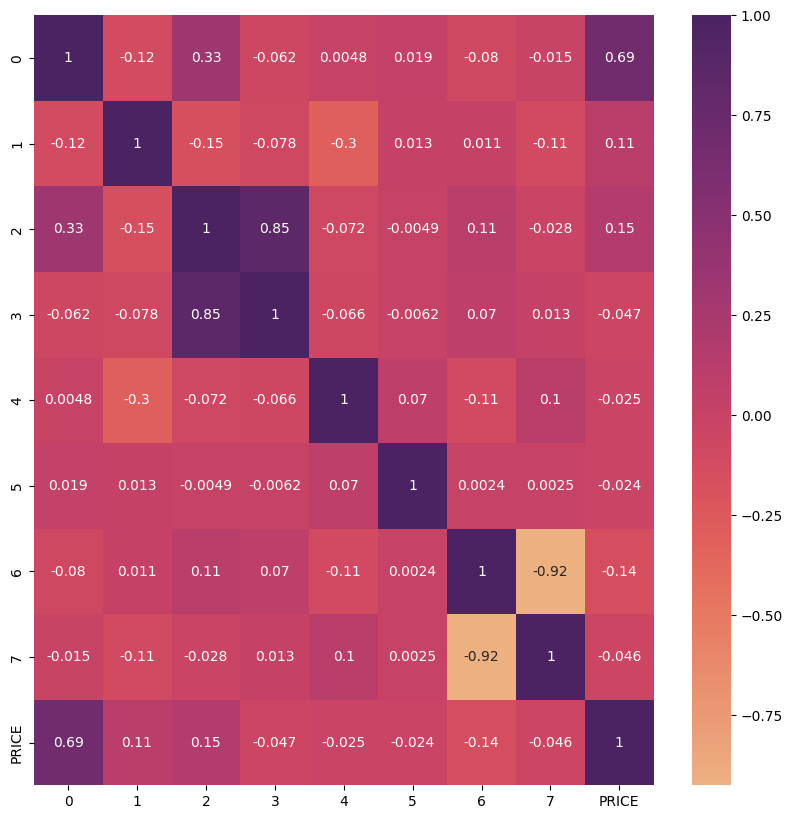

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), annot=True, cmap='flare')